<a href="https://colab.research.google.com/github/cagutierrezgu/My_Portfolio/blob/main/Podcast%20topic%20classification/Evaluation/Clusters_evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Evaluation
----

### Grouping models

En primer lugar, la evaluación de los métodos de clustering como *K-Means* o *GMM* pueden hacerse con el ya visto método del codo o calculando el "Silhouette coefficient". Es este último el que se usará para realizar comparaciones entre los dos métodos ya entrenados, empezando por *K-Means*:

Para k_clusters = 2 el promedio del silhouette_score es : 0.26544276
Para k_clusters = 3 el promedio del silhouette_score es : 0.28458667
Para k_clusters = 4 el promedio del silhouette_score es : 0.30729085
Para k_clusters = 5 el promedio del silhouette_score es : 0.26790115
Para k_clusters = 6 el promedio del silhouette_score es : 0.24579494


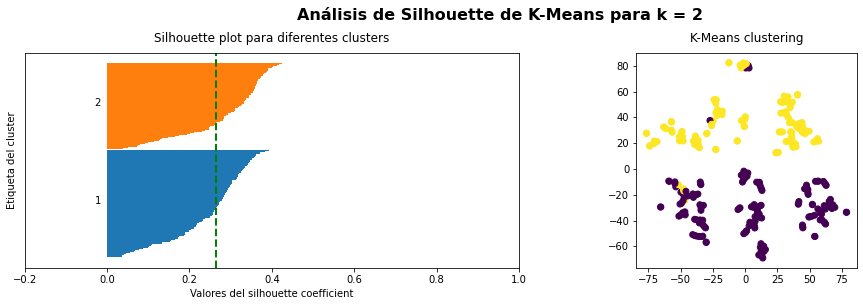

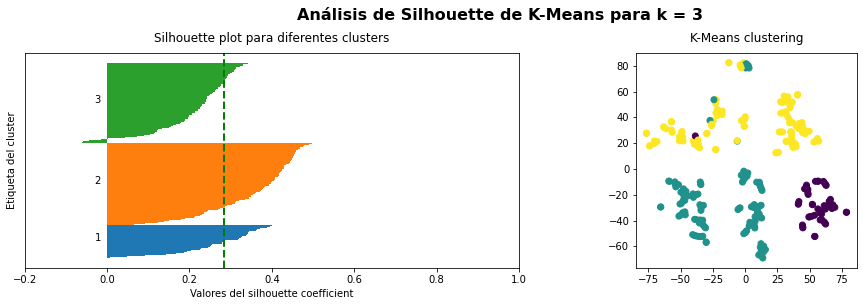

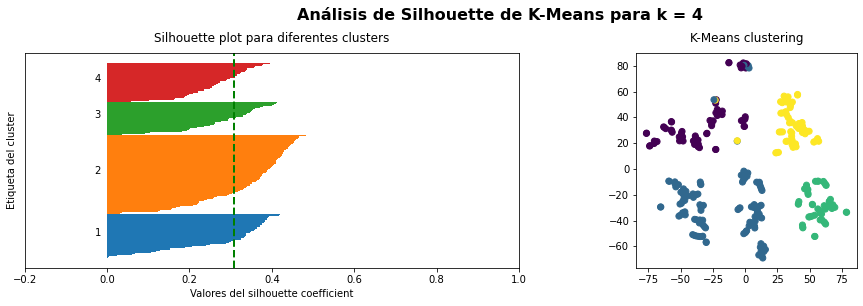

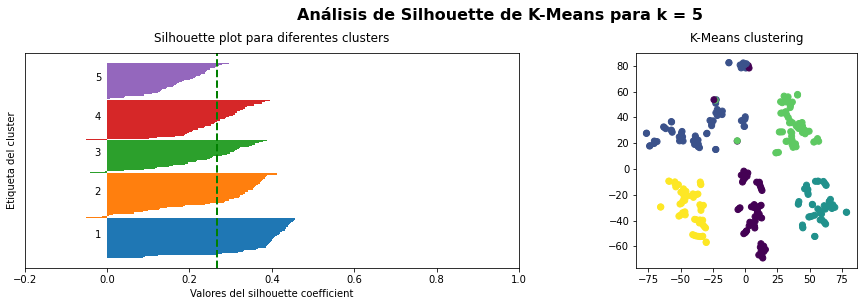

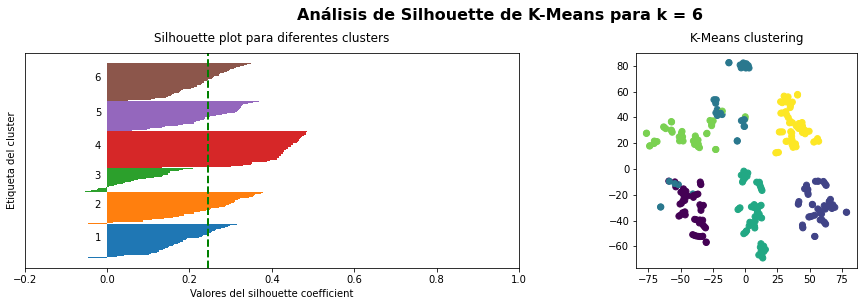

In [ ]:
for i, k in enumerate([2, 3, 4, 5, 6]):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(14, 4)
    
    # K-Means para un número de clusters k
    km = KMeans(n_clusters=k)
    labels = km.fit_predict(X_w2v)
    centroids = km.cluster_centers_

    # Silhouette samples sobre el conjunto de datos
    silhouette_vals = silhouette_samples(X_w2v, labels)

    # Silhouette plot
    y_ticks = []
    y_lower, y_upper = 0, 0
    for i, cluster in enumerate(np.unique(labels)):
        cluster_silhouette_vals = silhouette_vals[labels == cluster]
        cluster_silhouette_vals.sort()
        y_upper += len(cluster_silhouette_vals)
        ax1.barh(range(y_lower, y_upper), cluster_silhouette_vals, edgecolor='none', height=1)
        ax1.text(-0.03, (y_lower + y_upper) / 2, str(i + 1))
        y_lower += len(cluster_silhouette_vals)

    # Silhouette score graficado y sus valores para cada cluster y en promedio
    avg_score = np.mean(silhouette_vals)
    ax1.axvline(avg_score, linestyle='--', linewidth=2, color='green')
    ax1.set_yticks([])
    ax1.set_xlim([-0.2, 1])
    ax1.set_xlabel('Valores del silhouette coefficient')
    ax1.set_ylabel('Etiqueta del cluster')
    ax1.set_title('Silhouette plot para diferentes clusters', y=1.02);
    
    # Scatter para las representaciones con los colores de cada label
    ax2.scatter(T[:, 0], T[:, 1], c=labels)
    ax2.set_title('K-Means clustering', y=1.02)
    ax2.set_aspect('equal')
    plt.tight_layout()
    plt.suptitle(f'Análisis de Silhouette de K-Means para k = {k}',
                 fontsize=16, fontweight='semibold', y=1.05);
    
    # Silhouette score para cada número de clusters
    print(
        "Para k_clusters =",
        k,
        "el promedio del silhouette_score es :",
        avg_score,
    )

El resultado de la anterior prueba permite afirmar que el número de clusters más apropiado para el conjunto de datos trabajado es $K = 4$, ya que dicho coeficiente toma valores entre -1 y 1 y este valor debe maximizarse para mejores resultados. Veamos ahora los resultados para *GMM*:

Para n_clusters = 2 el promedio del silhouette_score es : 0.26673388
Para n_clusters = 3 el promedio del silhouette_score es : 0.284924
Para n_clusters = 4 el promedio del silhouette_score es : 0.30905887
Para n_clusters = 5 el promedio del silhouette_score es : 0.26790115
Para n_clusters = 6 el promedio del silhouette_score es : 0.24579494


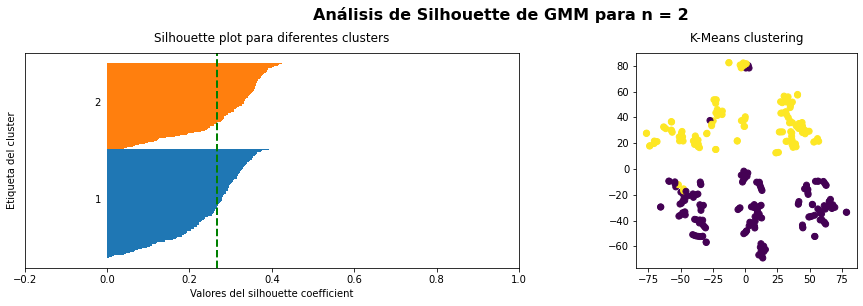

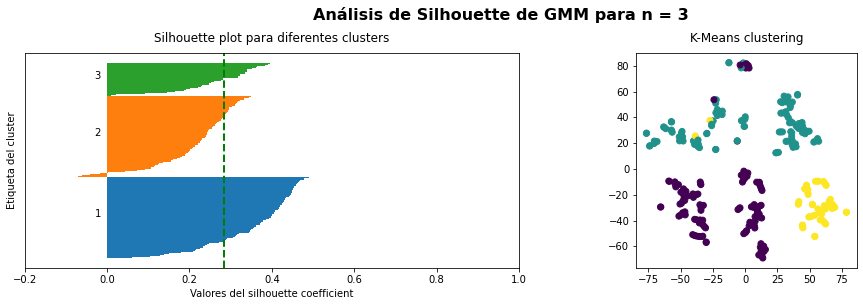

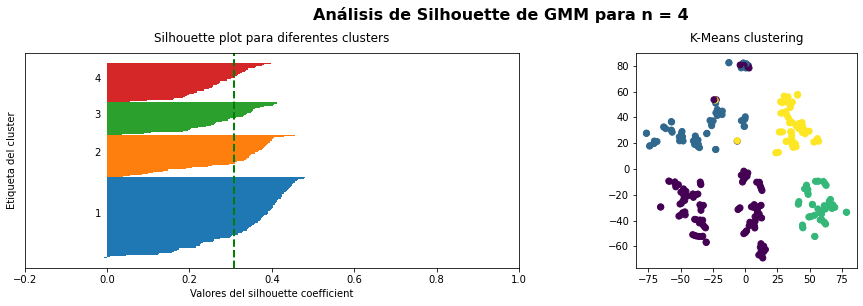

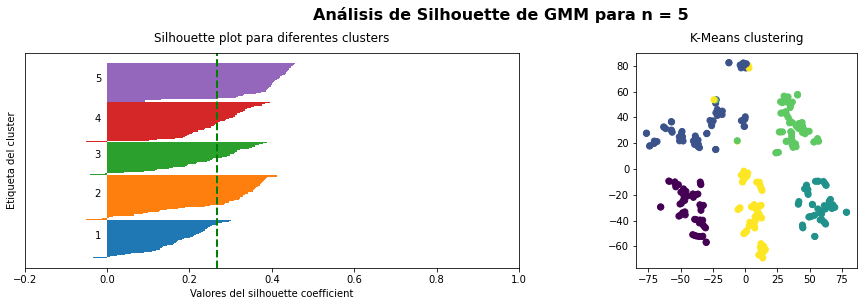

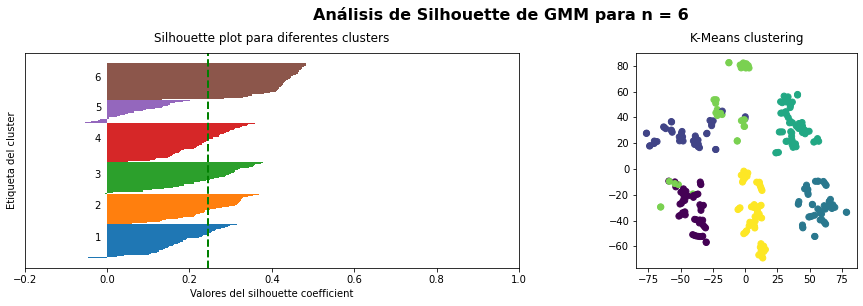

In [ ]:
for i, k in enumerate([2, 3, 4, 5, 6]):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(14, 4)
    
    # K-Means para un número de clusters k
    gaussm = GaussianMixture(n_components=k, covariance_type='full', random_state=42)
    labels = gaussm.fit_predict(X_w2v)

    # Silhouette samples sobre el conjunto de datos
    silhouette_vals = silhouette_samples(X_w2v, labels)

    # Silhouette plot
    y_ticks = []
    y_lower, y_upper = 0, 0
    for i, cluster in enumerate(np.unique(labels)):
        cluster_silhouette_vals = silhouette_vals[labels == cluster]
        cluster_silhouette_vals.sort()
        y_upper += len(cluster_silhouette_vals)
        ax1.barh(range(y_lower, y_upper), cluster_silhouette_vals, edgecolor='none', height=1)
        ax1.text(-0.03, (y_lower + y_upper) / 2, str(i + 1))
        y_lower += len(cluster_silhouette_vals)

    # Silhouette score graficado y sus valores para cada cluster y en promedio
    avg_score = np.mean(silhouette_vals)
    ax1.axvline(avg_score, linestyle='--', linewidth=2, color='green')
    ax1.set_yticks([])
    ax1.set_xlim([-0.2, 1])
    ax1.set_xlabel('Valores del silhouette coefficient')
    ax1.set_ylabel('Etiqueta del cluster')
    ax1.set_title('Silhouette plot para diferentes clusters', y=1.02);
    
    # Scatter para las representaciones con los colores de cada label
    ax2.scatter(T[:, 0], T[:, 1], c=labels)
    ax2.set_title('K-Means clustering', y=1.02)
    ax2.set_aspect('equal')
    plt.tight_layout()
    plt.suptitle(f'Análisis de Silhouette de GMM para n = {k}',
                 fontsize=16, fontweight='semibold', y=1.05);
    
    # Silhouette score para cada número de clusters
    print(
        "Para n_clusters =",
        k,
        "el promedio del silhouette_score es :",
        avg_score,
    )

Lo que quiere decir que los clusters formados por cada modelo tienen pocas diferencias, con una leve mejoría para *GMM* respecto a *K-Means* en la prueba de evaluación realizada. Además, ambos modelos de clasificación coinciden en que todo el conjunto de datos puede dividirse en 4 grandes grupos, mientras que inicialmente se tenían 5 podcasts diferentes.